In [1]:
import pandas as pd
df = pd.read_csv("../data/concrete/concrete.csv")
df.head()

,cement,flag,ash,water,superplastic,coarseagg,findagg,age,strength,class
0,164.2,0.0,200.1,181.2,12.6,849.3,846.0,28,15.09,0
1,164.0,0.0,200.0,181.0,13.0,849.0,846.0,28,15.09,0
2,158.0,0.0,195.0,220.0,11.0,898.0,713.0,28,8.54,0
3,144.0,15.0,195.0,176.0,6.0,1021.0,709.0,28,15.34,0
4,167.0,187.0,195.0,185.0,7.0,898.0,636.0,28,23.89,0


In [2]:
train_cols = ['cement', 'flag', 'ash', 'water', 'superplastic', 'coarseagg', 'findagg', 'age']
X = df[train_cols]
y = df['class']

In [3]:
# 언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample, columns=train_cols)
y_samp = pd.DataFrame(data=y_sample, columns=['class'])
df2 = pd.concat([X_samp, y_samp], axis=1)
df2['class'].value_counts()

0    507
1    507
Name: class, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(random_state=0, max_iter=1000)
model1.fit(X_train, y_train)
print("학습용 : ", model1.score(X_train, y_train))
print("검증용 : ", model1.score(X_test, y_test))

학습용 :  0.8543689320388349
검증용 :  0.8106796116504854


In [5]:
# 판별함수 : 음수이면 0, 양수이면 1로 판별함, 0이 판별기준이 됨
model1.decision_function(X_test[:5])
model1.predict(X_test[:5]) # 팜별함수값이 0보다 작으면 0, 0보다 크면 1로 분류

array([0, 0, 0, 0, 1], dtype=int64)

In [6]:
from sklearn.svm import SVC
model2 = SVC(random_state=0)
model2.fit(X_train, y_train)
print("학습용 : ", model2.score(X_train, y_train))
print("검증용 : ", model2.score(X_test, y_test))

학습용 :  0.7912621359223301
검증용 :  0.7669902912621359


In [7]:
model2.decision_function(X_test[:5])

array([-1.41175307, -0.72593477, -1.26178529, -0.61577978,  0.49492823])

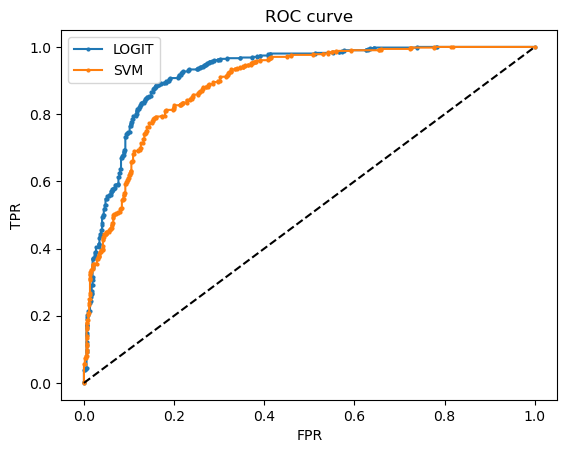

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# TPR(True Positive Rate, 민감도) - 1을 1로 잘 맞춘 비율, y축
# FPR(False Positive Rate, 특이도) - 0을 1로 틀린 비율, x축
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))
# 면적 (0.5 ~ 1.0)이 1에 가까울수록(좌측상단 꼭지점에 다가갈수록) 좋은 모형
plt.plot(fpr1, tpr1, 'o-', ms=2, label="LOGIT")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [9]:
#AUC(Area Under the Curve) : ROC Curve의 면적
#1에 가까울수록 좋은 모형
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9202541097672734, 0.8914602826207474)